In [1]:
#The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(None, 'f250fdcd-cca8-4f77-9de6-d9c02c3919c3', 'p-20e03b82add8102e5369b2cb96ae8c8d36d0dc05')
pc = project.project_context

In [2]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))

Project Name: Python Data Analysis
Project Description: Python Data Analysis
Project Bucket Name: pythondataanalysis-donotdelete-pr-xgmwfxjcvmypvc
Project Assets (Connections): []


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#df = pd.read_csv('data.csv', usecols=['horsepower', 'price'])

# Importing train data
#Getting csv file and loading as pandas datafarme
df = pd.read_csv(project.get_file('data.csv'), usecols=['horsepower', 'price'])
df.head(5)

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
horsepower    200 non-null int64
price         200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [8]:
df.isnull().sum()

horsepower    0
price         0
dtype: int64

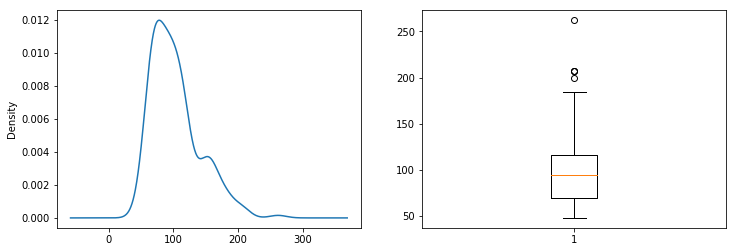

In [9]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

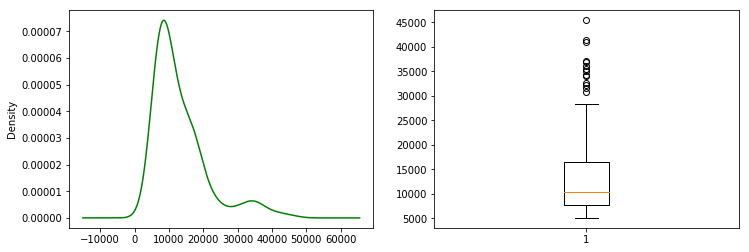

In [10]:
#Univariate analysis price.
#Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

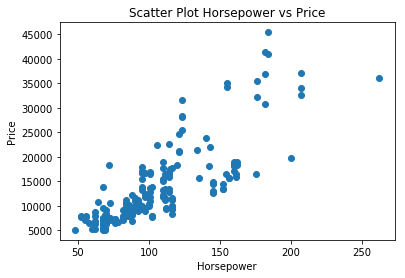

In [11]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [12]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [13]:
#Pertama, buat variabel x dan y.
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
lin_reg = LinearRegression()